In [1]:
import pandas as pd
import numpy as np

Temperatura (°C): https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

In [2]:
df_temp = pd.read_csv('./bd/GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
df_temp.shape

(577462, 4)

In [4]:
df_temp.info() #general information about our DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df_temp['Country'].unique() #Muestra la varidad de paises existentes

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
df_temp['year'] = pd.to_datetime(df_temp['dt']) #Conversion a formato de tiempo; fecha
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [7]:
idx =  df_temp['year'] > pd.to_datetime('1970-01-01') #Filtro para fechas mayores a 1970/01/01
df_temp = df_temp[idx] #Se reguarda el df con el filtro anterior
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [8]:
df_t_avg = df_temp.groupby([
    'Country', #Agrupado por Country
    pd.Grouper(key = 'year', freq = '1Y') #Al mismo tiempo agrupado por una frecuencia de cada año
]).agg({'AverageTemperature':[np.mean, np.median]}) #Se agregan ciertas funciones
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [9]:
df_t_avg.xs('Mexico')['AverageTemperature'] #Recolecta solo los datos de Mexico, tomando la columna AverageTemperature

,mean,median
year,,
1970-12-31,21.036182,21.5130
1971-12-31,20.640333,20.6605
1972-12-31,20.975000,22.1485
1973-12-31,20.496167,20.8200
1974-12-31,20.631500,21.0005
1975-12-31,20.449333,20.9585
1976-12-31,20.145667,20.3740
1977-12-31,20.841250,21.0620
1978-12-31,20.755500,21.2615


<AxesSubplot:xlabel='year'>

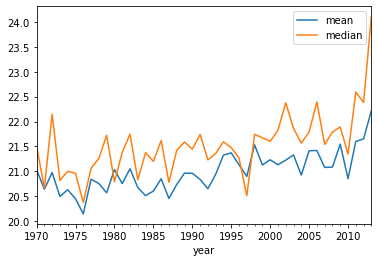

In [10]:
df_t_avg.xs('Mexico')['AverageTemperature'].plot()

<AxesSubplot:xlabel='year'>

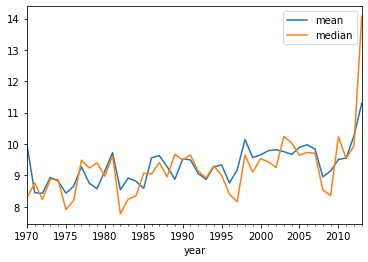

In [11]:
df_t_avg.xs('United States')['AverageTemperature'].plot()

<AxesSubplot:xlabel='year'>

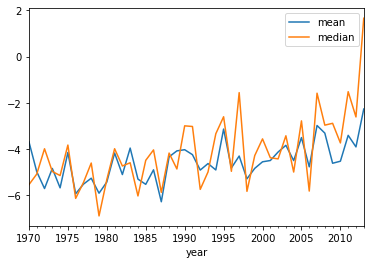

In [12]:
df_t_avg.xs('Russia')['AverageTemperature'].plot()

In [13]:
#Se crea un nuevo DF con las columnas originales, incluyendo solo el cálculo de la media que esta en AverageTemperature
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [14]:
df_t_med['date'] = df_t_med['year'].dt.year #De la columna year se obtiene solo el año, y se guarda en una nueva columna
#llamada date
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [15]:
df_t_med.rename(columns = {'median':'temperature'}, inplace = True) #Renombrar una columna
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Con el siguiente código, se crea una nueva tabla, donde los indices de las columnas son los paises, los indices de las filas el año y las celdas son los valores de la temperatura

In [16]:
df_t_pivot = df_t_med.pivot_table(values = 'temperature', index = 'date', columns = 'Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


<AxesSubplot:>

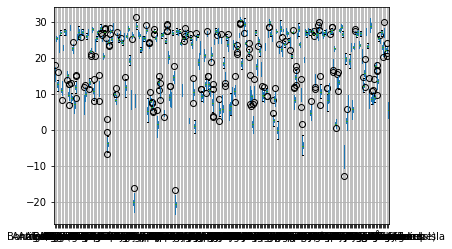

In [17]:
df_t_pivot.boxplot() #Como son muchos datos, es difícil analizarlo

In [18]:
df_t_pivot.T.sample(2).T.head(5) #Se creo un nuevo df de forma aleatoria con 2 paises

Country,Denmark,Syria
date,,
1970,-17.905,19.477
1971,-21.916,17.122
1972,-21.077,19.430
1973,-20.815,18.926
1974,-19.356,19.135


<AxesSubplot:>

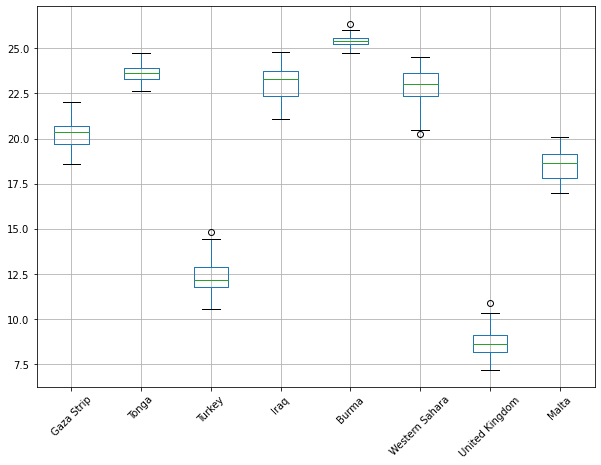

In [19]:
df_t_pivot.T.sample(8).T.boxplot(figsize = (10, 7), rot = 45, grid = True)

Las BD se encuentran en la siguiente página: https://data.worldbank.org/topic/climate-change

In [20]:
df_agri = pd.read_csv('./bd/API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv', header = 2)
df_fore = pd.read_csv('./bd/API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv', header = 2)
df_elec = pd.read_csv('./bd/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3475310.csv', header = 2)
df_co2e = pd.read_csv('./bd/API_19_DS2_en_csv_v2_3470836.csv', header = 2)
df_popu = pd.read_csv('./bd/API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv', header = 2)

In [21]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [22]:
year = list(map(str, range(1971, 2015))) # Se crea una lista con los años del rango establecido
year[:8]

['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978']

In [23]:
fechas = pd.date_range(start='1970', end='2015', freq='Y') #Otra manera de generar los años
fechas = fechas.map(lambda x: str(x.year))
fechas

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')

In [24]:
cols = ['Country Name', 'Country Code'] + year #Se crea una lista de columnas
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

Esta es una manera rápida de seleccionar un grupo de columnas de interes

In [25]:
df_agri.loc[:,cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,...,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,...,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.00,230480.00,229840.00,230870.00,235860.00,234360.0,236360.00,238360.00,237360.00,238360.00


La siguiente línea realiza lo siguiente: Toma todas las columnas de las fechas con sus respectivos y los coloca en filas, repitiendo los datos de Country Name, Country Code e incluso el año.
- Hacer esto nos puede ayudar a realizar una buena agrupación ya sea por el nombre del país o del código del mismo

In [26]:
df_agri.loc[:,cols].melt(id_vars = ['Country Name', 'Country Code']).rename( #Renombrar columnas
    columns = {
        'variable'    : 'date',
        'Country Name': 'Country',
        'Country Code': 'name',
        'value'       : 'agriculture'
    })

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [27]:
#Función sin hacer conversion a float el año
def fun_formato(df, col = 'agriculture'):    
    return df.loc[:,cols].melt(id_vars = ['Country Name', 'Country Code']).rename( #Renombrar columnas
        columns = {
            'variable'    : 'date',
            'Country Name': 'Country',
            'Country Code': 'name',
            'value'       :  col
        })

In [28]:
def fun_format(df, col = 'agriculture'):
    df = df.loc[:, cols].melt(id_vars=['Country Name','Country Code']).rename( #Renombrar las columnas
    columns = {'variable':'date',
               'Country Name':'Country',
               'Country Code':'name',
               'value': col})
    df['date'] = df['date'].astype(float) #Aquí se aplica directamente el valor de los años a float
    #Lo anterior sería un paso innecesario en caso de no usarse
    return df

In [29]:
df_agri = fun_format(df_agri, col = 'agriculture') #Se aplica el formato a este DF, así mismo a los demás
df_agri

,Country,name,date,agriculture
0,Aruba,ABW,1971.0,20.0
1,Africa Eastern and Southern,AFE,1971.0,5360170.0
2,Afghanistan,AFG,1971.0,380360.0
3,Africa Western and Central,AFW,1971.0,3102665.6
4,Angola,AGO,1971.0,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014.0,NaN
11700,"Yemen, Rep.",YEM,2014.0,234516.0
11701,South Africa,ZAF,2014.0,963410.0
11702,Zambia,ZMB,2014.0,238360.0


In [30]:
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')

In [31]:
df_popu

,Country,name,date,population
0,Aruba,ABW,1971.0,59442.0
1,Africa Eastern and Southern,AFE,1971.0,175100167.0
2,Afghanistan,AFG,1971.0,11475450.0
3,Africa Western and Central,AFW,1971.0,123184308.0
4,Angola,AGO,1971.0,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014.0,1812771.0
11700,"Yemen, Rep.",YEM,2014.0,25823488.0
11701,South Africa,ZAF,2014.0,54544184.0
11702,Zambia,ZMB,2014.0,15399793.0


In [32]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [33]:
df_t_med.columns

Index(['Country', 'year', 'temperature', 'date'], dtype='object')

In [34]:
df_popu.columns

Index(['Country', 'name', 'date', 'population'], dtype='object')

El siguiente bloque de código aplica un merge a dos DF:
- Para el caso de df_t_med solo se toman 3 columnas de interes; cabe mencionar que es necesario el uso de doble parentesis cuadrados para indicar que se trata de DF
- Del DF df_popu se toma completamente
- on: sirve para indicar las columnas las cuales deben ser unidas
- how: es para indicar el tipo de merge aplicado (Ver diagramas de Venn)

In [35]:
df_merge = pd.merge(df_t_med[['Country', 'temperature', 'date']],
                    df_popu, on = ['Country', 'date'], how = 'inner')
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475450.0
1,Afghanistan,13.8725,1972,AFG,11791222.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412960.0
4,Afghanistan,13.5130,1975,AFG,12689164.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0


In [36]:
#Se apliaca merge a todos los DF para tener solo una con los datos de interes
df_merge = pd.merge(df_merge,
                    df_co2e, on = ['Country', 'name', 'date'], how = 'inner')
df_merge = pd.merge(df_merge,
                    df_elec, on = ['Country', 'name', 'date'], how = 'inner')
df_merge = pd.merge(df_merge,
                    df_agri, on = ['Country', 'name', 'date'], how = 'inner')
df_merge = pd.merge(df_merge,
                    df_fore, on = ['Country', 'name', 'date'], how = 'inner')
df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475450.0,1.202100e+01,NaN,380360.0,NaN
1,Afghanistan,14.9340,1971,AFG,11475450.0,1.379464e+06,NaN,380360.0,NaN
2,Afghanistan,14.9340,1971,AFG,11475450.0,5.860102e+00,NaN,380360.0,NaN
3,Afghanistan,14.9340,1971,AFG,11475450.0,1.147545e+07,NaN,380360.0,NaN
4,Afghanistan,14.9340,1971,AFG,11475450.0,2.665129e+00,NaN,380360.0,NaN
...,...,...,...,...,...,...,...,...,...
549019,Zimbabwe,20.4505,2013,ZWE,13350378.0,NaN,628.746242,162000.0,177670.7
549020,Zimbabwe,20.4505,2013,ZWE,13350378.0,NaN,628.746242,162000.0,177670.7
549021,Zimbabwe,20.4505,2013,ZWE,13350378.0,1.033993e+01,628.746242,162000.0,177670.7
549022,Zimbabwe,20.4505,2013,ZWE,13350378.0,4.187670e+01,628.746242,162000.0,177670.7


In [60]:
df_climate = df_merge.dropna()
df_climate

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
4712,Albania,13.4,1990,ALB,"3,286,542.0",36.4,552.3,"11,210.0","7,888.0"
4713,Albania,13.4,1990,ALB,"3,286,542.0","1,197,222.0",552.3,"11,210.0","7,888.0"
4714,Albania,13.4,1990,ALB,"3,286,542.0",2.5,552.3,"11,210.0","7,888.0"
4715,Albania,13.4,1990,ALB,"3,286,542.0","3,286,542.0",552.3,"11,210.0","7,888.0"
4716,Albania,13.4,1990,ALB,"3,286,542.0",1.8,552.3,"11,210.0","7,888.0"
...,...,...,...,...,...,...,...,...,...
549014,Zimbabwe,20.5,2013,ZWE,"13,350,378.0",45.9,628.7,"162,000.0","177,670.7"
549015,Zimbabwe,20.5,2013,ZWE,"13,350,378.0","177,670.7",628.7,"162,000.0","177,670.7"
549021,Zimbabwe,20.5,2013,ZWE,"13,350,378.0",10.3,628.7,"162,000.0","177,670.7"
549022,Zimbabwe,20.5,2013,ZWE,"13,350,378.0",41.9,628.7,"162,000.0","177,670.7"


In [47]:
pd.set_option('display.float_format', '{:,.1f}'.format) #Línea para dar formato a los valores float

El siguiente código agrupa el DF por los países, recolectando la mediana para evitar sesgos estadisticos por valores atipicos de la columna 'co2', y se ordenan los valores

In [46]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending = False)
#Los valores de CO2 no son del documento correcto; se tendría que verificar en la BD

Country
Montenegro   40.1
Brazil       40.0
Guatemala    38.8
Canada       38.8
Senegal      38.3
             ... 
Libya         8.8
Qatar         8.7
Iceland       7.8
Suriname      7.3
Malta         4.6
Name: co2, Length: 120, dtype: float64

In [48]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending = False).head(10)

Country
Montenegro   40.1
Brazil       40.0
Guatemala    38.8
Canada       38.8
Senegal      38.3
Argentina    37.6
Mauritius    36.9
Israel       36.3
Nigeria      36.2
Pakistan     35.9
Name: co2, dtype: float64

In [51]:
#Con index, se crea una lista con los primeros diez países encontrados
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending = False).head(10).index
first_10

Index(['Montenegro', 'Brazil', 'Guatemala', 'Canada', 'Senegal', 'Argentina',
       'Mauritius', 'Israel', 'Nigeria', 'Pakistan'],
      dtype='object', name='Country')

El siguiente código, es un filtro que recolecta todos los datos del DF, para todos los nombres de los paises que coincidad con la lista de first_10

In [61]:
df_max_co2 = df_climate[df_climate['Country'].isin(first_10)]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
21052,Argentina,15.4,1990,ARG,"32,618,648.0",87.0,"1,304.0","1,275,650.0","352,040.0"
21053,Argentina,15.4,1990,ARG,"32,618,648.0","28,373,005.0","1,304.0","1,275,650.0","352,040.0"
21054,Argentina,15.4,1990,ARG,"32,618,648.0",1.9,"1,304.0","1,275,650.0","352,040.0"
21055,Argentina,15.4,1990,ARG,"32,618,648.0","32,618,648.0","1,304.0","1,275,650.0","352,040.0"
21056,Argentina,15.4,1990,ARG,"32,618,648.0",1.5,"1,304.0","1,275,650.0","352,040.0"
...,...,...,...,...,...,...,...,...,...
444438,Senegal,29.9,2013,SEN,"13,782,429.0",43.4,215.3,"88,680.0","83,481.6"
444439,Senegal,29.9,2013,SEN,"13,782,429.0","83,481.6",215.3,"88,680.0","83,481.6"
444445,Senegal,29.9,2013,SEN,"13,782,429.0",16.6,215.3,"88,680.0","83,481.6"
444446,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,215.3,"88,680.0","83,481.6"


<AxesSubplot:xlabel='population', ylabel='co2'>

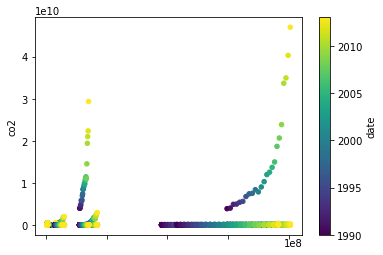

In [62]:
df_max_co2.set_index('Country').plot.scatter( #Un tipo de graficación con scatter
    #Los datos que estaran en eje X y Y
    x='population',
    y='co2',
    c='date', #Definicion de color definido por el año
    colormap='viridis') #Este es el color para identificar variaciones, en este caso el que define el año

In [64]:
df_climate.corr() #Este muestra la correlacion de los datos; aunque este no sea tan simple de entender

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.0,-0.5,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.0,-0.1,0.6,0.4
co2,-0.0,0.0,0.0,1.0,0.0,0.1,0.1
electricprod,-0.5,0.1,-0.1,0.0,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.1,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.1,0.2,0.7,1.0


In [65]:
import seaborn as sns

<AxesSubplot:>

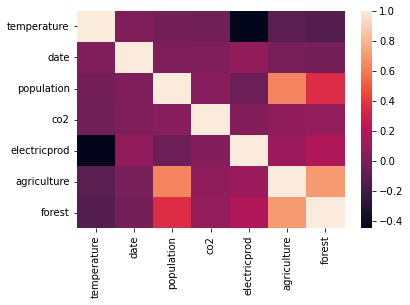

In [67]:
sns.heatmap(df_climate.corr()) #Es la misma matriz anterior, pero hecho con colores

<AxesSubplot:>

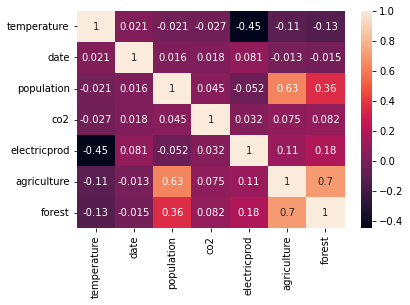

In [70]:
sns.heatmap(df_climate.corr(), annot = True) #Con annot se pueden ver los valores en la grafica
#Este tipo de gráfica muestra la correlacion que tienen unos con otros. Los colores claros son aquellos que más relación
#tiene. Por ejemplo: el valor de 0.7 de la parte inferior, es el impacto que se tiene entre la agricultura y
#la deforestación. Así mismo, se pueden observar otros casos. Cabe mencionar que aquí se usaron los países

In [73]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,230,931.0",18.2,"1,157.4","91,700.0","63,710.0"
1991,22.4,"10,373,400.0",19.7,"1,096.2","92,100.0","63,705.0"
1992,19.9,"9,952,494.0",23.1,"1,446.5","91,600.0","48,916.8"
1993,20.4,"9,964,675.0",21.3,"1,514.7","88,180.0","46,251.5"
1994,20.2,"10,037,522.0",21.3,"1,576.8","89,150.0","45,551.5"
1995,20.0,"10,136,811.0",21.0,"1,634.4","81,080.0","44,952.0"
1996,19.7,"10,156,637.0",22.1,"1,728.1","79,870.0","44,380.0"
1997,20.0,"10,117,433.0",24.0,"1,802.8","80,120.0","43,808.0"
1998,20.9,"10,160,196.0",26.4,"1,808.3","80,550.0","43,236.0"


<AxesSubplot:>

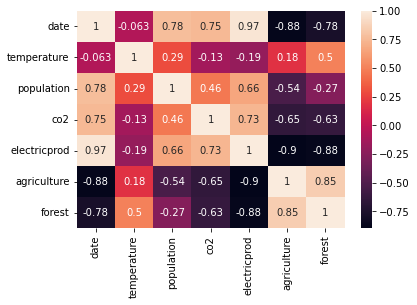

In [75]:
sns.heatmap(df_med.reset_index().corr(), annot = True)
#En esta gráfica se muestra la correlación que existe, pero ahora esta dada con el paso del tiempo es decir, como se 
#marca el impacto con respecto de cada año y cómo se relaciona cada uno de los datos

In [76]:
from pandas.plotting import scatter_matrix #Esta libreria sirve tambien para graficar y ver correlaciones entre datos

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

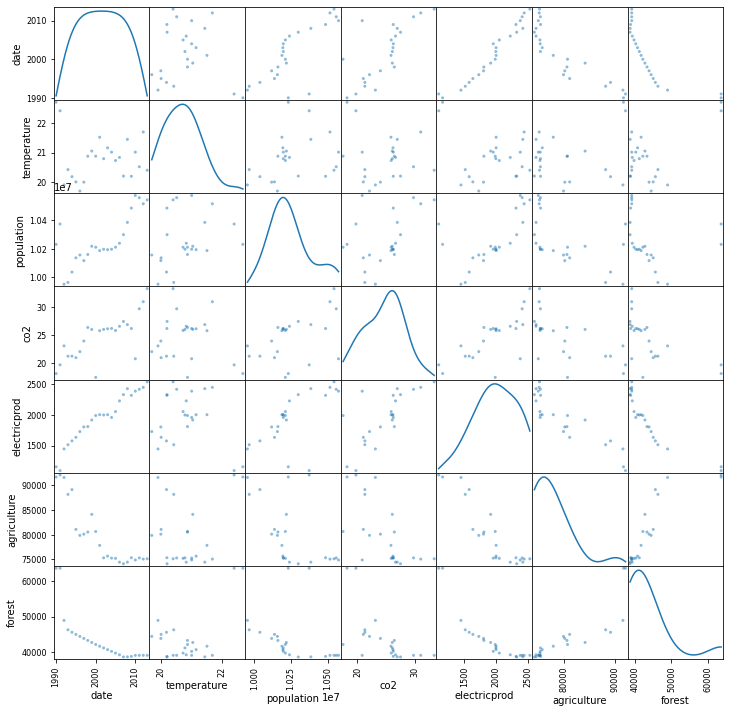

In [87]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize = (12,12)) #Muestra una correlación de los datos

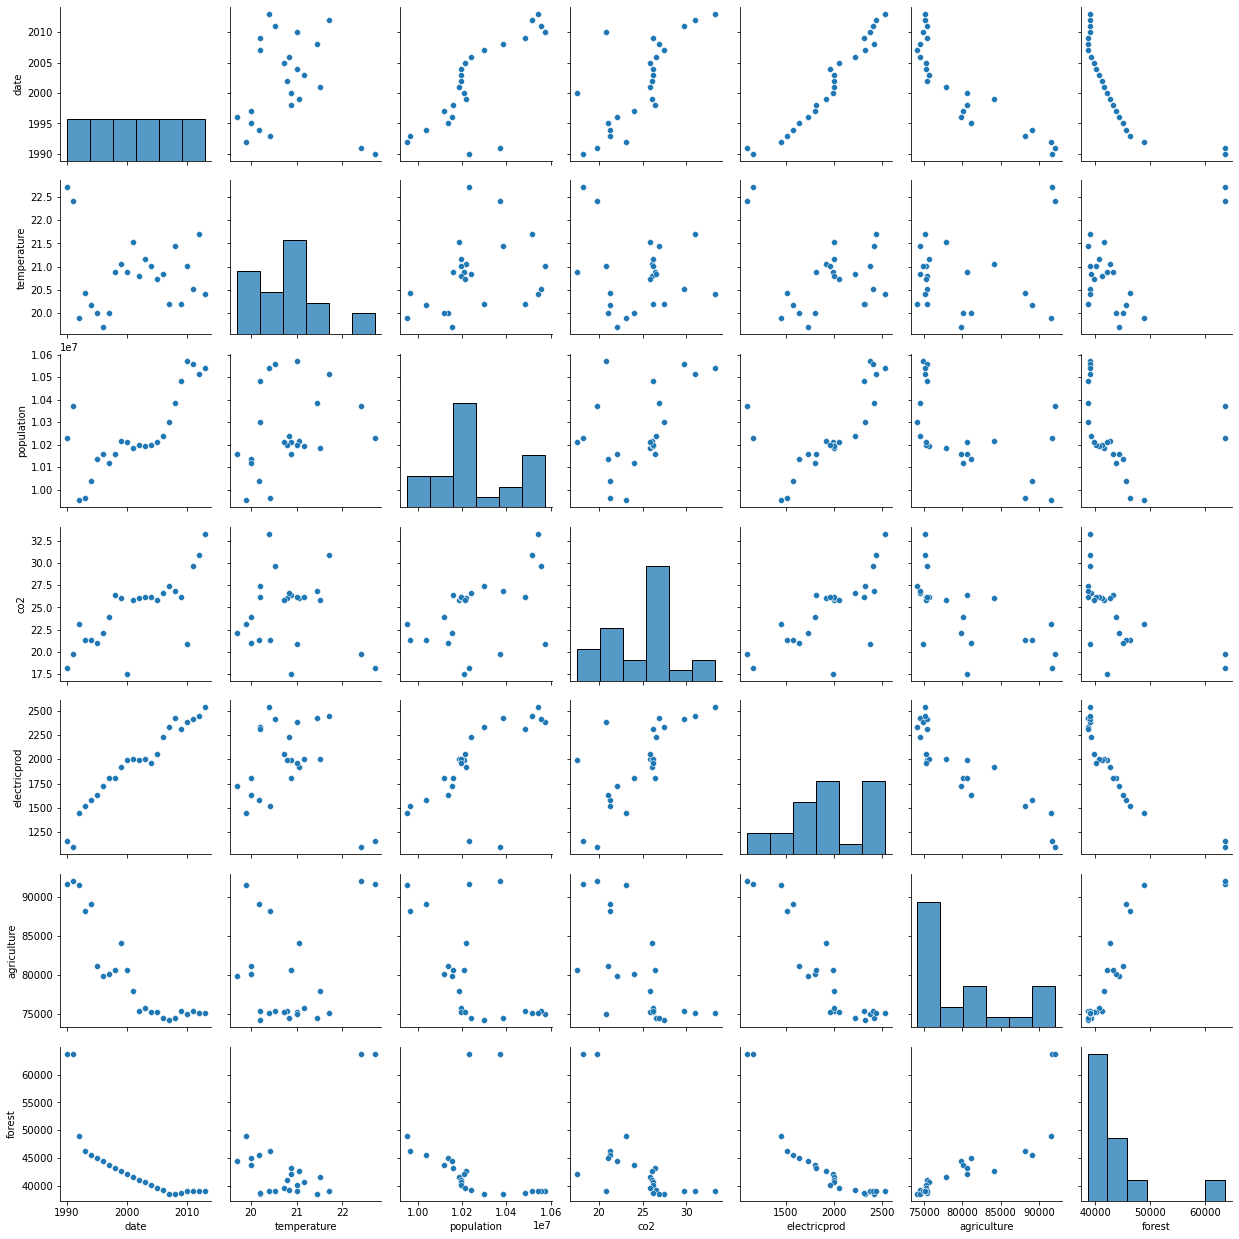

In [89]:
sns.pairplot(df_med.reset_index())

In [81]:
from pandas.plotting import parallel_coordinates

In [83]:
df_samerica = df_climate[ #Se toman los datos del DF de los paises que coicidan en "isin"
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])
][['Country', #Aquí solo se seleccionan ciertas columnas
 'temperature',
 'co2',
 'agriculture',
 'forest']]

<AxesSubplot:>

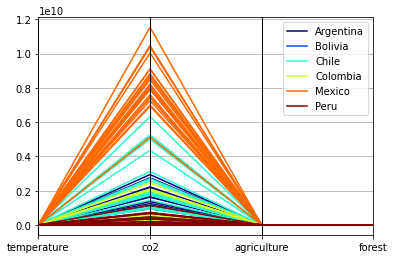

In [84]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet') #Hay diversos tipos de colores